In [2]:
import pandas as pd 
import numpy as np

In [3]:
DrDoS_DNS_data = pd.read_csv('DrDoS_DNS_data_per.csv')
DrDoS_LDAP_data = pd.read_csv('DrDoS_LDAP_data_per.csv')
DrDoS_MSSQL_data = pd.read_csv('DrDoS_MSSQL_data_per.csv')
DrDoS_NetBIOS_data = pd.read_csv('DrDoS_NetBIOS_data_per.csv')
DrDoS_NTP_data = pd.read_csv('DrDoS_NTP_data_per.csv')
DrDoS_SNMP_data = pd.read_csv('DrDoS_SNMP_data_per.csv')
DrDoS_SSDP_data = pd.read_csv('DrDoS_SSDP_data_per.csv')
DrDoS_UDP_data = pd.read_csv('DrDoS_UDP_data_per.csv')
Syn_data = pd.read_csv('Syn_data_per.csv')
UDPLag_data = pd.read_csv('UDPLag_data_per.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_20936\4270368974.py:1: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  DrDoS_DNS_data = pd.read_csv('DrDoS_DNS_data_per.csv')
C:\Users\hp\AppData\Local\Temp\ipykernel_20936\4270368974.py:2: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  DrDoS_LDAP_data = pd.read_csv('DrDoS_LDAP_data_per.csv')
C:\Users\hp\AppData\Local\Temp\ipykernel_20936\4270368974.py:3: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  DrDoS_MSSQL_data = pd.read_csv('DrDoS_MSSQL_data_per.csv')
C:\Users\hp\AppData\Local\Temp\ipykernel_20936\4270368974.py:4: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  DrDoS_NetBIOS_data = pd.read_csv('DrDoS_NetBIOS_data_per.csv')
C:\Users\hp\AppData\Local\Temp\ipykernel_20936\4270368974.py:6: DtypeWarning: Columns (86) have mi

In [4]:
# Merge all the Dataset to make one data 
data = pd.concat([DrDoS_DNS_data, DrDoS_LDAP_data, DrDoS_MSSQL_data, DrDoS_NetBIOS_data, DrDoS_NTP_data, DrDoS_SNMP_data, DrDoS_SSDP_data, DrDoS_UDP_data, Syn_data, UDPLag_data], ignore_index = True)

In [5]:
data.shape

(742925, 89)

In [6]:
data[' Label'].value_counts()

DrDoS_SNMP       128993
DrDoS_DNS        126779
DrDoS_MSSQL      113062
DrDoS_NetBIOS    102334
DrDoS_UDP         78380
DrDoS_SSDP        65270
DrDoS_LDAP        54496
Syn               34505
DrDoS_NTP         30058
UDP-lag            8266
BENIGN              774
WebDDoS               8
Name:  Label, dtype: int64

In [7]:
# Drop Unnamed:0, Unnamed:0.1 columns 
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [8]:
data.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [9]:
data_real = data.replace(np.inf, np.nan)

In [10]:
data_real.isnull().sum().sum()

27886

In [11]:
data_df = data_real.dropna(axis=0)

In [12]:
data_df.isnull().sum().sum()

0

In [13]:
data_df

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,172.16.0.5-192.168.50.1-702-19002-17,172.16.0.5,702,192.168.50.1,19002,17,2018-12-01 11:08:37.221226,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,172.16.0.5-192.168.50.1-647-55666-17,172.16.0.5,647,192.168.50.1,55666,17,2018-12-01 11:11:35.264967,48,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
2,172.16.0.5-192.168.50.1-564-64440-17,172.16.0.5,564,192.168.50.1,64440,17,2018-12-01 11:14:31.706047,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,172.16.0.5-192.168.50.1-662-57255-17,172.16.0.5,662,192.168.50.1,57255,17,2018-12-01 11:07:46.876001,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,172.16.0.5-192.168.50.1-676-32822-17,172.16.0.5,676,192.168.50.1,32822,17,2018-12-01 11:13:59.869883,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742920,172.16.0.5-192.168.50.1-59112-59112-17,172.16.0.5,59112,192.168.50.1,59112,17,2018-12-01 13:11:27.719229,122,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
742921,172.16.0.5-192.168.50.1-45040-22860-6,172.16.0.5,45040,192.168.50.1,22860,6,2018-12-01 13:30:03.415687,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
742922,172.16.0.5-192.168.50.1-36575-18862-6,172.16.0.5,36575,192.168.50.1,18862,6,2018-12-01 13:30:13.838633,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
742923,172.16.0.5-192.168.50.1-63440-63440-6,172.16.0.5,63440,192.168.50.1,63440,6,2018-12-01 13:30:00.104494,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag


In [14]:
data_df.to_csv('data_final.csv', index = False)

In [15]:
data_X = data_df.drop([' Label', 'SimillarHTTP'], axis = 1)

In [16]:
data_X.columns 

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [17]:
data_X.shape 

(728982, 85)

In [18]:
data_y = data_df[' Label']

In [19]:
data_y.shape

(728982,)

In [20]:
data_df.isnull().sum().sum()

0

In [21]:
data_y.unique()

array(['DrDoS_DNS', 'BENIGN', 'DrDoS_LDAP', 'DrDoS_MSSQL',
       'DrDoS_NetBIOS', 'DrDoS_NTP', 'DrDoS_SNMP', 'DrDoS_SSDP',
       'DrDoS_UDP', 'Syn', 'UDP-lag', 'WebDDoS'], dtype=object)

In [22]:
data_X

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,172.16.0.5-192.168.50.1-702-19002-17,172.16.0.5,702,192.168.50.1,19002,17,2018-12-01 11:08:37.221226,2,2,0,...,83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,172.16.0.5-192.168.50.1-647-55666-17,172.16.0.5,647,192.168.50.1,55666,17,2018-12-01 11:11:35.264967,48,2,0,...,879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,172.16.0.5-192.168.50.1-564-64440-17,172.16.0.5,564,192.168.50.1,64440,17,2018-12-01 11:14:31.706047,1,2,0,...,1472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,172.16.0.5-192.168.50.1-662-57255-17,172.16.0.5,662,192.168.50.1,57255,17,2018-12-01 11:07:46.876001,1,2,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,172.16.0.5-192.168.50.1-676-32822-17,172.16.0.5,676,192.168.50.1,32822,17,2018-12-01 11:13:59.869883,1,2,0,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742920,172.16.0.5-192.168.50.1-59112-59112-17,172.16.0.5,59112,192.168.50.1,59112,17,2018-12-01 13:11:27.719229,122,2,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
742921,172.16.0.5-192.168.50.1-45040-22860-6,172.16.0.5,45040,192.168.50.1,22860,6,2018-12-01 13:30:03.415687,1,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
742922,172.16.0.5-192.168.50.1-36575-18862-6,172.16.0.5,36575,192.168.50.1,18862,6,2018-12-01 13:30:13.838633,1,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
742923,172.16.0.5-192.168.50.1-63440-63440-6,172.16.0.5,63440,192.168.50.1,63440,6,2018-12-01 13:30:00.104494,2,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Label Encoding for the Dataset

In [23]:
from sklearn.preprocessing import LabelEncoder 

In [24]:
le = LabelEncoder()

In [25]:
data_y_trans = le.fit_transform(data_y)

In [26]:
data_y_trans

array([ 1,  1,  1, ..., 10, 10, 10])

In [27]:
le_fid = LabelEncoder()

In [28]:
le_fid.fit(data_X['Flow ID'])
data_X['Flow ID'] = le_fid.fit_transform(data_X['Flow ID'])

In [29]:
le_SIP = LabelEncoder()

In [30]:
le_SIP.fit(data_X[' Source IP'])
data_X[' Source IP'] = le_SIP.fit_transform(data_X[' Source IP'])

In [31]:
le_DIP = LabelEncoder()

In [32]:
le_DIP.fit(data_X[' Destination IP'])
data_X[' Destination IP'] = le_DIP.fit_transform(data_X[' Destination IP'])

In [33]:
le_timestamp = LabelEncoder()
le_timestamp.fit(data_X[' Timestamp'])
data_X[' Timestamp'] = le_timestamp.fit_transform(data_X[' Timestamp'])

In [34]:
data_X

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,488670,6,702,71,19002,17,61371,2,2,0,...,83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,417171,6,647,71,55666,17,98287,48,2,0,...,879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,285760,6,564,71,64440,17,134744,1,2,0,...,1472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,444362,6,662,71,57255,17,51215,1,2,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,469223,6,676,71,32822,17,128617,1,2,0,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742920,326283,6,59112,71,59112,17,687248,122,2,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
742921,151428,6,45040,71,22860,6,691035,1,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
742922,91333,6,36575,71,18862,6,692344,1,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
742923,402312,6,63440,71,63440,6,690588,2,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [35]:
data_X.dtypes

Flow ID                int32
 Source IP             int32
 Source Port           int64
 Destination IP        int32
 Destination Port      int64
                      ...   
Idle Mean            float64
 Idle Std            float64
 Idle Max            float64
 Idle Min            float64
 Inbound               int64
Length: 85, dtype: object

### Feature Selection

In [36]:
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import SelectKBest 
from sklearn.ensemble import ExtraTreesClassifier

#selecting 20 best features
#select_best= SelectKBest(chi2, k=20)
#X_feat_20 = select_best.fit_transform(data_X, data_y_trans)
#X_feat_20.shape

model = ExtraTreesClassifier(random_state=42)
model.fit(data_X, data_y_trans)

ExtraTreesClassifier(random_state=42)

In [37]:
model.feature_importances_

array([2.86019939e-02, 4.07493246e-04, 7.44199125e-02, 1.33598934e-04,
       1.26931506e-02, 8.82716969e-03, 3.55846673e-01, 3.37502895e-03,
       2.29283154e-03, 2.96926688e-05, 8.62799464e-03, 1.31576146e-05,
       3.24512383e-02, 5.01125565e-02, 4.14319256e-02, 3.03643016e-03,
       2.46056337e-05, 3.63673445e-05, 1.55839806e-05, 9.06435820e-06,
       3.66458954e-02, 1.90724086e-02, 3.86674153e-03, 1.27124105e-03,
       2.33730270e-03, 2.95962215e-03, 1.97363792e-03, 2.37859873e-03,
       1.14450927e-03, 2.88519818e-03, 2.16494841e-03, 3.30053918e-05,
       3.77964034e-05, 2.70297781e-05, 3.16231641e-05, 3.89004247e-05,
       1.81114770e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.67931494e-03, 6.05334450e-05, 2.01226182e-02, 9.32263058e-05,
       4.92127005e-02, 3.22074121e-02, 4.63534748e-02, 2.13639028e-03,
       5.38642841e-04, 0.00000000e+00, 2.81197526e-06, 1.98669114e-05,
       0.00000000e+00, 1.70495808e-02, 1.28090320e-04, 4.66275114e-05,
      

<AxesSubplot:title={'center':'Standardised Dataset Feature Selection using ExtraTreesClassifier'}>

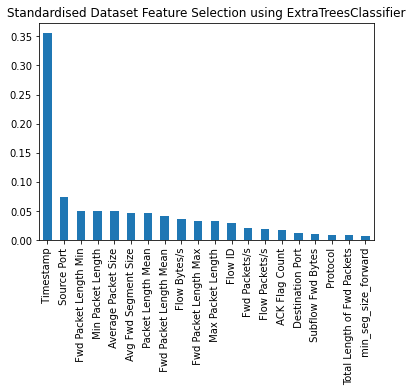

In [38]:
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [39]:
data_X.shape 

(728982, 85)

In [40]:
data_new_20features_X = data_X[[' Timestamp', ' Source Port', ' Min Packet Length', ' Fwd Packet Length Min', 'Flow ID', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', 'Flow Bytes/s', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', ' Flow Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' Destination Port', ' act_data_pkt_fwd']]

In [41]:
data_new_20features_X

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,Fwd Packet Length Mean,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd
0,61371,702,1472.0,1472.0,488670,1472.0,1472.0,2208.0,0,1472.0,1472.0,1.472000e+09,1472.0,17,1.000000e+06,1.000000e+06,2944.0,2944,19002,1
1,98287,647,1448.0,1448.0,417171,1448.0,1448.0,2172.0,0,1448.0,1448.0,6.033333e+07,1448.0,17,4.166667e+04,4.166667e+04,2896.0,2896,55666,1
2,134744,564,1472.0,1472.0,285760,1472.0,1472.0,2208.0,0,1472.0,1472.0,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944,64440,1
3,51215,662,1472.0,1472.0,444362,1472.0,1472.0,2208.0,0,1472.0,1472.0,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944,57255,1
4,128617,676,1472.0,1472.0,469223,1472.0,1472.0,2208.0,0,1472.0,1472.0,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944,32822,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742920,687248,59112,520.0,1472.0,326283,1091.2,1472.0,1364.0,0,1472.0,1472.0,3.265574e+07,1472.0,17,1.639344e+04,3.278689e+04,2944.0,2944,59112,1
742921,691035,45040,0.0,0.0,151428,0.0,0.0,0.0,1,0.0,0.0,0.000000e+00,0.0,6,2.000000e+06,2.000000e+06,0.0,0,22860,0
742922,692344,36575,0.0,0.0,91333,0.0,0.0,0.0,1,0.0,0.0,0.000000e+00,0.0,6,2.000000e+06,2.000000e+06,0.0,0,18862,0
742923,690588,63440,0.0,0.0,402312,0.0,0.0,0.0,1,0.0,0.0,0.000000e+00,0.0,6,1.000000e+06,1.000000e+06,0.0,0,63440,0


### Train Test Split Normal dataset 85 Features 

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y_trans, test_size = 0.30, random_state = 42)

In [43]:
X_train.shape 

(510287, 85)

In [44]:
X_test.shape 

(218695, 85)

### Standardization of the 84 Feature Dataset 

In [45]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

### Train Test Split 20 Feature Dataset 

In [46]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)

### Standardization of the 20 Feature Dataset 

In [47]:
from sklearn.preprocessing import StandardScaler 
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

In [48]:
X_train_std_20.shape 

(510287, 20)

In [49]:
y_train_20.shape

(510287,)

In [50]:
X_test_std_20.shape 

(218695, 20)

In [51]:
y_test_20.shape 

(218695,)

### 1. Random Forest Classification 

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_std_20, y_train_20)

RandomForestClassifier()

In [53]:
rf_y_pred = rf.predict(X_test_std_20)

In [54]:
rf_y_pred

array([5, 2, 3, ..., 1, 2, 3])

In [55]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

In [56]:
print("Classification Report for Random Forest: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(rf_y_pred)))

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Random Forest: 
                precision    recall  f1-score   support

       BENIGN       0.94      1.00      0.97       238
    DrDoS_DNS       0.99      1.00      0.99     36586
   DrDoS_LDAP       0.99      0.99      0.99     16061
  DrDoS_MSSQL       1.00      0.99      1.00     32963
    DrDoS_NTP       0.99      0.97      0.98      9064
DrDoS_NetBIOS       1.00      1.00      1.00     29779
   DrDoS_SNMP       1.00      1.00      1.00     38531
   DrDoS_SSDP       1.00      1.00      1.00     19514
    DrDoS_UDP       1.00      1.00      1.00     23196
          Syn       1.00      1.00      1.00     10330
      UDP-lag       0.99      0.97      0.98      2432
      WebDDoS       0.00      0.00      0.00         1

     accuracy                           0.99    218695
    macro avg       0.91      0.91      0.91    218695
 weighted avg       0.99      0.99      0.99    218695



c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
rf_conf_mat = confusion_matrix(y_test_20, rf_y_pred)
print("Random Forest Confusion: \n", rf_conf_mat)

Random Forest Confusion: 
 [[  237     1     0     0     0     0     0     0     0     0     0     0]
 [    0 36506     1     0    79     0     0     0     0     0     0     0]
 [    1   171 15886     3     0     0     0     0     0     0     0     0]
 [    1     0   169 32792     1     0     0     0     0     0     0     0]
 [    0   302     0     0  8762     0     0     0     0     0     0     0]
 [    0     0     0   126     0 29653     0     0     0     0     0     0]
 [    5     0     0     0     0    97 38428     1     0     0     0     0]
 [    0     0     0     0     0     3    69 19441     1     0     0     0]
 [    6     0     0     0     0     1     1    84 23102     0     2     0]
 [    0     0     0     0     0     0     0     0     0 10307    23     0]
 [    0     0     0     0     0     2     1     0    64     0  2365     0]
 [    1     0     0     0     0     0     0     0     0     0     0     0]]


In [58]:
acc_score = accuracy_score(y_test_20, rf_y_pred)
print("Accuracy Score for Random_Forest: \n", acc_score*100)

Accuracy Score for Random_Forest: 
 99.44397448501337


In [59]:
# RoC curve Function 

def RoC_Curve(classifier, X_val, y_val, title): 
        """ RoC Curve for Classifier 
        Parameters: 
        ------------
        classifier: Machine Learning Classifier to be Evaluated
        X_val: Validation Dataset
        y_val: Label/Target of Validation Dataset

        Attributes:
        Plots the Graph    
        
        Note: Some part of this Method code is taken 
            from Sklearn Website
        """

        lw = 2
        n_classes = 12
        y_test1 = to_categorical(y_val)
        pred_RFC_proba = classifier.predict_proba(X_val)
        y_score = pred_RFC_proba

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(20,10))
        plt.plot(fpr["micro"], tpr["micro"],
                label='micro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["micro"]),
                color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                label='macro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["macro"]),
                color='navy', linestyle=':', linewidth=4)

        list_class = ['BENIGN', 'DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL', 'DrDoS_NTP', 'DrDoS_NetBIOS', 'DrDoS_SNMP', 'DrDoS_SSDP', 'DrDoS_UDP', 'Syn', 'UDP-lag', 'WebDDoS']
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], lw=lw,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(list_class[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title) 
        plt.legend(loc="lower right")
        plt.show()



In [60]:
from keras.utils.np_utils import to_categorical
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 

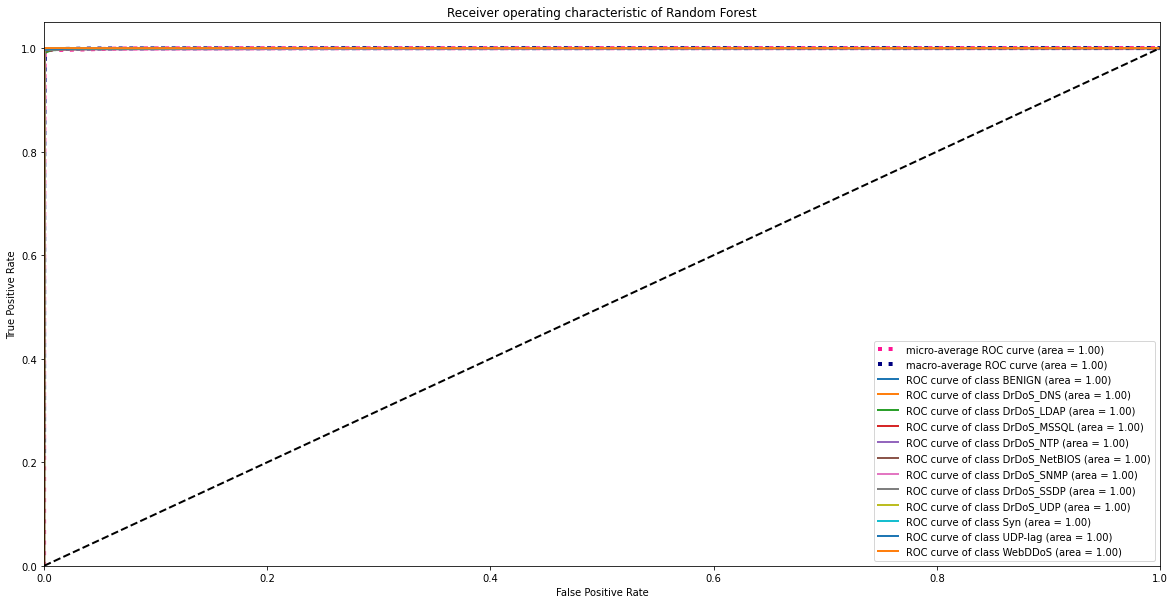

In [61]:
title = 'Receiver operating characteristic of Random Forest'
RoC_Curve(rf, X_test_std_20, y_test_20, title)

### 2. Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
dt.fit(X_train_std_20, y_train_20)

DecisionTreeClassifier()

In [63]:
dt_y_pred = dt.predict(X_test_std_20)

In [64]:
print("Classification Report for Decision Tree: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(dt_y_pred)))

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Decision Tree: 
                precision    recall  f1-score   support

       BENIGN       0.06      0.24      0.10       238
    DrDoS_DNS       1.00      1.00      1.00     36586
   DrDoS_LDAP       0.99      0.99      0.99     16061
  DrDoS_MSSQL       1.00      0.99      1.00     32963
    DrDoS_NTP       0.97      1.00      0.99      9064
DrDoS_NetBIOS       1.00      0.97      0.98     29779
   DrDoS_SNMP       1.00      1.00      1.00     38531
   DrDoS_SSDP       1.00      1.00      1.00     19514
    DrDoS_UDP       1.00      1.00      1.00     23196
          Syn       1.00      1.00      1.00     10330
      UDP-lag       0.98      0.99      0.99      2432
      WebDDoS       0.00      0.00      0.00         1

     accuracy                           0.99    218695
    macro avg       0.83      0.85      0.84    218695
 weighted avg       0.99      0.99      0.99    218695



c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
dt_conf_mat = confusion_matrix(y_test_20, dt_y_pred)
print("Decision Tree Confusion: \n", dt_conf_mat)

Decision Tree Confusion: 
 [[   56    14    11    14    96     9     9     4     6     0    19     0]
 [    0 36406     0     0   180     0     0     0     0     0     0     0]
 [    0   168 15893     0     0     0     0     0     0     0     0     0]
 [    0     0   169 32794     0     0     0     0     0     0     0     0]
 [    0     0     0     0  9064     0     0     0     0     0     0     0]
 [  861     0     0   121     0 28797     0     0     0     0     0     0]
 [    3     0     0     0     0    93 38435     0     0     0     0     0]
 [    0     0     0     0     0     0    63 19451     0     0     0     0]
 [    0     0     0     0     0     0     0    49 23147     0     0     0]
 [    0     0     0     0     0     0     0     0     0 10307    23     0]
 [    0     0     0     0     0     0     0     0    17     0  2415     0]
 [    0     0     0     0     0     0     0     0     0     0     1     0]]


In [66]:
acc_score_dt = accuracy_score(y_test_20, dt_y_pred)
print("Accuracy Score for Decision Tree: \n", acc_score_dt*100)

Accuracy Score for Decision Tree: 
 99.11749239808866


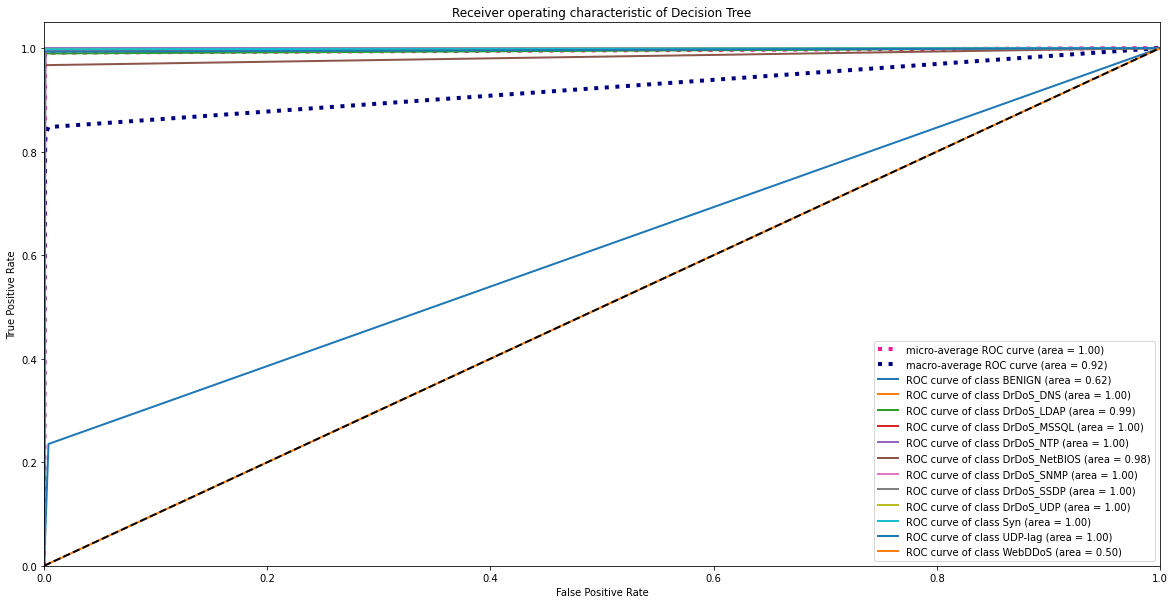

In [67]:
# RoC Curve 
title = 'Receiver operating characteristic of Decision Tree'
RoC_Curve(dt, X_test_std_20, y_test_20, title)

### 3. SVM

In [68]:
from sklearn.svm import LinearSVC
svm = LinearSVC(multi_class = 'ovr')
svm.fit(X_train_std_20, y_train_20)

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [69]:
y_pred_svm = svm.predict(X_test_std_20) 

In [70]:
svm.score(X_test_std_20, y_test_20)

0.9225130890052357

In [71]:
print("Classification Report for Random Forest: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(y_pred_svm)))

Classification Report for Random Forest: 
                precision    recall  f1-score   support

       BENIGN       0.94      0.76      0.84       238
    DrDoS_DNS       0.84      0.98      0.90     36586
   DrDoS_LDAP       0.97      0.59      0.73     16061
  DrDoS_MSSQL       0.95      0.94      0.94     32963
    DrDoS_NTP       0.99      0.96      0.97      9064
DrDoS_NetBIOS       0.88      0.99      0.93     29779
   DrDoS_SNMP       0.99      0.95      0.97     38531
   DrDoS_SSDP       1.00      0.85      0.92     19514
    DrDoS_UDP       0.92      1.00      0.96     23196
          Syn       0.88      1.00      0.94     10330
      UDP-lag       0.79      0.28      0.41      2432
      WebDDoS       0.25      1.00      0.40         1

     accuracy                           0.92    218695
    macro avg       0.87      0.86      0.83    218695
 weighted avg       0.93      0.92      0.92    218695



In [72]:
svm_conf_mat = confusion_matrix(y_test_20, y_pred_svm)
print("SVM Confusion Matrix: \n", svm_conf_mat)

SVM Confusion Matrix: 
 [[  180     1     0    42     1     1     2     0    11     0     0     0]
 [    2 35699    14   257    79   520     0     0     0     0    15     0]
 [    0  6554  9447    44     0    10     0     0     0     0     6     0]
 [    1     0   285 30912     0  1592    22     8     0     0   143     0]
 [    4   390     0     4  8666     0     0     0     0     0     0     0]
 [    1     0     0   321     0 29448     2     0     0     0     7     0]
 [    1     1     0     2     0  1728 36785     4     0     0     9     1]
 [    0     0     0  1113     0     8   334 16494  1565     0     0     0]
 [    2     0     0     0     0     5    52    17 23118     0     0     2]
 [    0     0     0     0     0     0     0     0     5 10325     0     0]
 [    0     0     1     0     0     0    15     0   328  1414   674     0]
 [    0     0     0     0     0     0     0     0     0     0     0     1]]


In [73]:
acc_score_svm = accuracy_score(y_test_20, y_pred_svm)
print("Accuracy Score for SVM: \n", acc_score_svm*100)

Accuracy Score for SVM: 
 92.25130890052357


In [74]:
# RoC Curve 
# RoC curve Function 

def RoC_Curve_SVM(classifier, X_val, y_val, title): 
        """ RoC Curve for Classifier 
        Parameters: 
        ------------
        classifier: Machine Learning Classifier to be Evaluated
        X_val: Validation Dataset
        y_val: Label/Target of Validation Dataset

        Attributes:
        Plots the Graph    
        
        Note: Some part of this Method code is taken 
            from Sklearn Website
        """

        lw = 2
        n_classes = 12
        y_test1 = to_categorical(y_val)
        pred_RFC_proba = classifier.decision_function(X_val)
        y_score = pred_RFC_proba

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(20,10))
        plt.plot(fpr["micro"], tpr["micro"],
                label='micro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["micro"]),
                color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                label='macro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["macro"]),
                color='navy', linestyle=':', linewidth=4)

        list_class = ['BENIGN', 'DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL', 'DrDoS_NTP', 'DrDoS_NetBIOS', 'DrDoS_SNMP', 'DrDoS_SSDP', 'DrDoS_UDP', 'Syn', 'UDP-lag', 'WebDDoS']
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], lw=lw,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(list_class[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title) 
        plt.legend(loc="lower right")
        plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_20936\2271868172.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


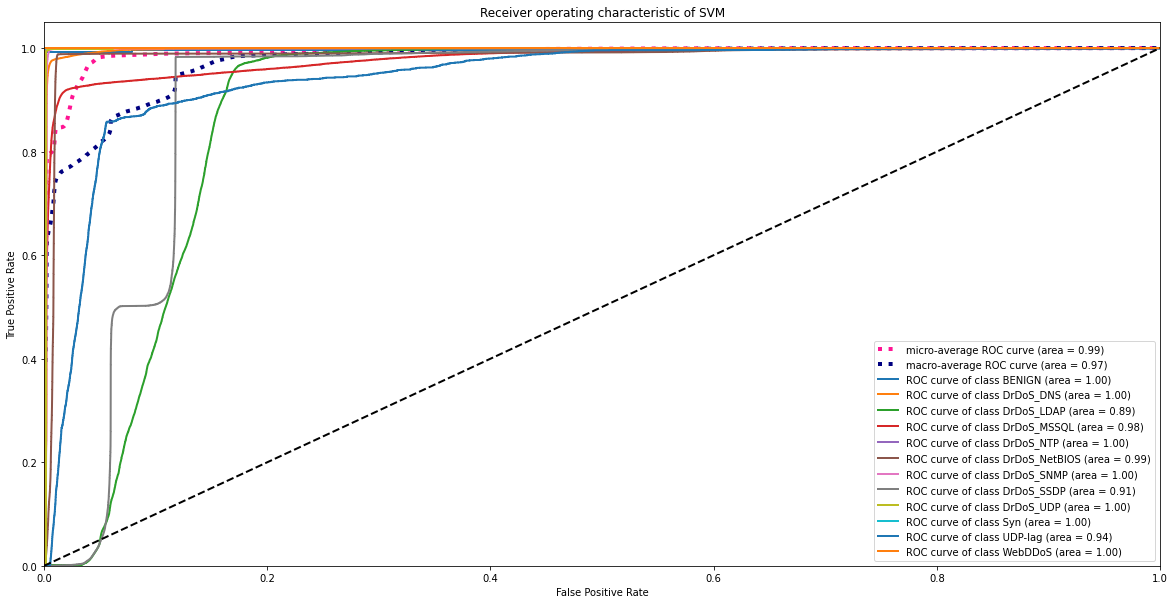

In [75]:
# RoC Curve 
title = 'Receiver operating characteristic of SVM'
RoC_Curve_SVM(svm, X_test_std_20, y_test_20, title)

### 4. Naive Bayes

In [76]:
from sklearn.naive_bayes import GaussianNB 

In [77]:
gnb = GaussianNB()
gnb.fit(X_train_std_20, y_train_20)
gnb_y_pred = gnb.predict(X_test_std_20)

In [78]:
print("Classification Report for Naive Bayes: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(gnb_y_pred)))

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Naive Bayes: 
                precision    recall  f1-score   support

       BENIGN       0.40      0.97      0.56       238
    DrDoS_DNS       0.98      0.36      0.52     36586
   DrDoS_LDAP       0.43      0.98      0.60     16061
  DrDoS_MSSQL       0.92      0.99      0.95     32963
    DrDoS_NTP       0.98      0.96      0.97      9064
DrDoS_NetBIOS       0.94      0.99      0.96     29779
   DrDoS_SNMP       0.99      0.95      0.97     38531
   DrDoS_SSDP       0.95      0.42      0.59     19514
    DrDoS_UDP       0.67      0.98      0.80     23196
          Syn       0.83      1.00      0.91     10330
      UDP-lag       0.25      0.00      0.00      2432
      WebDDoS       0.00      0.00      0.00         1

     accuracy                           0.81    218695
    macro avg       0.70      0.72      0.65    218695
 weighted avg       0.88      0.81      0.80    218695



c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
gnb_conf_mat = confusion_matrix(y_test_20, gnb_y_pred)
print("Naive Bayes Confusion Matrix: \n", gnb_conf_mat)

Naive Bayes Confusion Matrix: 
 [[  232     0     0     1     1     0     0     0     0     2     2     0]
 [  238 13110 20751  2197   171   119     0     0     0     0     0     0]
 [    7   208 15814    32     0     0     0     0     0     0     0     0]
 [    3    44   329 32555     0     0     4    26     2     0     0     0]
 [   58     6     0   279  8721     0     0     0     0     0     0     0]
 [    9     1     0   362     0 29372     1    34     0     0     0     0]
 [   17    13     0    22     0  1711 36753    15     0     0     0     0]
 [    4     1     0     0     0     1   330  8286 10892     0     0     0]
 [   17     0     0     3     0     0    39   313 22824     0     0     0]
 [    1     0     0     0     0     0     0     5     0 10324     0     0]
 [    0     0     0    38     0     0     9     4   292  2088     1     0]
 [    0     0     0     0     0     0     0     0     0     0     1     0]]


In [80]:
acc_score_gnb = accuracy_score(y_test_20, gnb_y_pred)
print("Accuracy Score for Naive: \n", acc_score_gnb*100)

Accuracy Score for Naive: 
 81.38823475616726


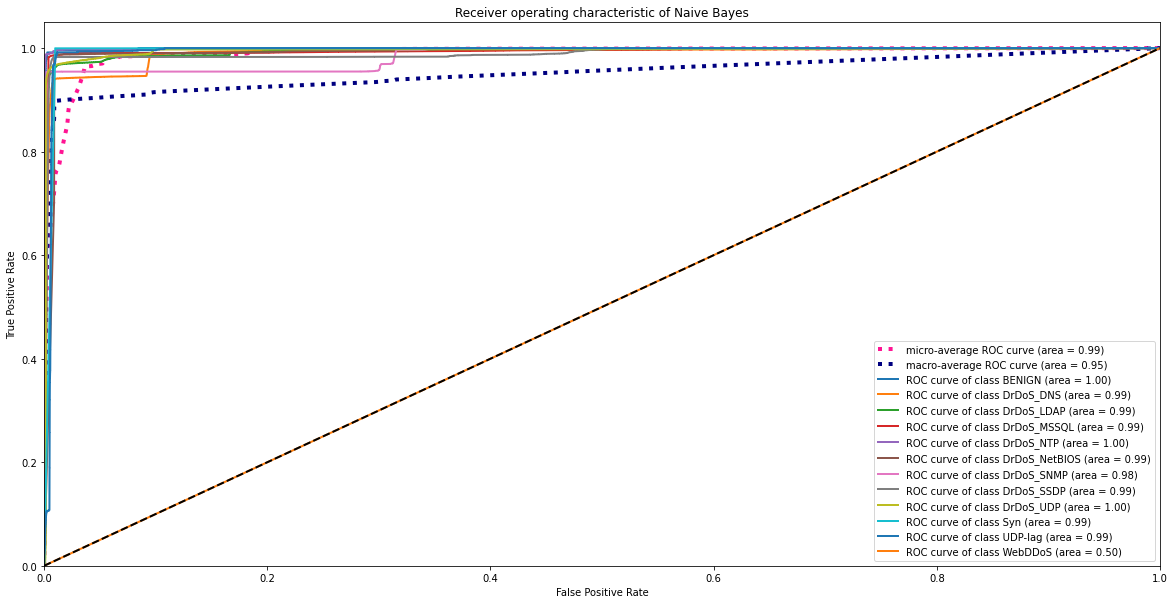

In [81]:
# RoC Curve 
title = 'Receiver operating characteristic of Naive Bayes'
RoC_Curve(gnb, X_test_std_20, y_test_20, title)

### 5. MLP

In [82]:
from __future__ import print_function
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [83]:
y_train_MLP_20 = np.array(y_train_20)
y_test_MLP_20 = np.array(y_test_20)

y_train_MLP_onehot_20 = to_categorical(y_train_MLP_20)
y_test_MLP_onehot_20 = to_categorical(y_test_MLP_20)

X_train_20_MLP = np.array(X_train_std_20)
X_test_20_MLP = np.array(X_test_std_20)

In [84]:
batch_size = 1000

# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=20,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(2024,activation='relu'))  
model.add(Dropout(0.01))
# model.add(Dense(3024,activation='relu'))  
# model.add(Dropout(0.01))
# model.add(Dense(2500,activation='relu'))  
# model.add(Dropout(0.01))
model.add(Dense(2000,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1000,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(500,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(200,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(12))
model.add(Activation('softmax'))
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
      restore_best_weights=True)

In [85]:
# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])
model.fit(X_train_20_MLP, y_train_MLP_onehot_20, validation_data=(X_test_20_MLP, y_test_MLP_onehot_20),batch_size=batch_size, epochs=50,callbacks=[monitor])

Epoch 1/50
511/511 [==============================] - 237s 461ms/step - loss: 2.3933 - accuracy: 0.3547 - val_loss: 2.2877 - val_accuracy: 0.5176
Epoch 2/50
511/511 [==============================] - 268s 524ms/step - loss: 2.1392 - accuracy: 0.5019 - val_loss: 1.9474 - val_accuracy: 0.5793
Epoch 3/50
511/511 [==============================] - 292s 573ms/step - loss: 1.7718 - accuracy: 0.6665 - val_loss: 1.5834 - val_accuracy: 0.7217
Epoch 4/50
511/511 [==============================] - 277s 542ms/step - loss: 1.4145 - accuracy: 0.7314 - val_loss: 1.2136 - val_accuracy: 0.7503
Epoch 5/50
511/511 [==============================] - 262s 513ms/step - loss: 1.0552 - accuracy: 0.7623 - val_loss: 0.8835 - val_accuracy: 0.7717
Epoch 6/50
511/511 [==============================] - 281s 550ms/step - loss: 0.7856 - accuracy: 0.7762 - val_loss: 0.6779 - val_accuracy: 0.7794
Epoch 7/50
511/511 [==============================] - 268s 525ms/step - loss: 0.6268 - accuracy: 0.7863 - val_loss: 0.5606 -

In [86]:
y_pred_MLP = np.argmax(model.predict(X_test_20_MLP), axis=-1)

In [87]:
y_pred_MLP

array([5, 2, 3, ..., 1, 2, 3], dtype=int64)

In [88]:
print("Classification Report for MLP: \n", classification_report(le.inverse_transform(y_test_MLP_20), le.inverse_transform(y_pred_MLP)))

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for MLP: 
                precision    recall  f1-score   support

       BENIGN       0.00      0.00      0.00       238
    DrDoS_DNS       0.97      0.98      0.98     36586
   DrDoS_LDAP       0.96      0.97      0.96     16061
  DrDoS_MSSQL       0.99      0.98      0.98     32963
    DrDoS_NTP       0.95      0.95      0.95      9064
DrDoS_NetBIOS       0.94      0.99      0.96     29779
   DrDoS_SNMP       0.99      0.95      0.97     38531
   DrDoS_SSDP       0.99      0.94      0.96     19514
    DrDoS_UDP       0.95      0.99      0.97     23196
          Syn       0.83      1.00      0.91     10330
      UDP-lag       0.00      0.00      0.00      2432
      WebDDoS       0.00      0.00      0.00         1

     accuracy                           0.96    218695
    macro avg       0.71      0.73      0.72    218695
 weighted avg       0.95      0.96      0.96    218695



c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
mlp_conf_mat = confusion_matrix(y_test_20, y_pred_MLP)
print("MLP Confusion: \n", mlp_conf_mat)

MLP Confusion: 
 [[    0     1     0    75    81    26     6     6    12    17    14     0]
 [    0 35807   418    30   331     0     0     0     0     0     0     0]
 [    0   524 15516    16     2     3     0     0     0     0     0     0]
 [    0    97   312 32318    52   160    24     0     0     0     0     0]
 [    0   422     0     5  8637     0     0     0     0     0     0     0]
 [    0     0     0   339     0 29433     1     0     0     0     6     0]
 [    0     0     0     0     0  1720 36797     5     3     0     6     0]
 [    0     0     0     0     1     0   333 18411   769     0     0     0]
 [    0     0     0     0     0     0    52   256 22882     2     4     0]
 [    0     0     0     0     0     0     0     1     4 10325     0     0]
 [    0     0     0     0     0     0    47     0   297  2088     0     0]
 [    0     0     0     0     0     0     0     0     0     1     0     0]]


In [90]:
acc_score_mlp = accuracy_score(y_test_20, y_pred_MLP)
print("Accuracy Score for MLP: \n", acc_score_mlp*100)

Accuracy Score for MLP: 
 96.08175769907862


In [95]:
# RoC Curve 
title = 'Receiver operating characteristic of MultiLayer Perceptron'
RoC_Curve(model, X_test_std_20, y_test_20, title)

AttributeError: 'Sequential' object has no attribute 'predict_proba'

### 6. LSTM

In [96]:
y_train_lstm_20 = np.array(y_train_20)
y_test_lstm_20 = np.array(y_test_20)

y_train_onehot_lstm = to_categorical(y_train_lstm_20)
y_test_one_hot_lstm = to_categorical(y_test_lstm_20)

X_train_lstm_20 = np.array(X_train_std_20)
X_test_lstm_20 = np.array(X_test_std_20)

In [97]:
X_test_std_20

array([[-0.20447693, -0.75640291, -0.9869797 , ..., -0.30229263,
         0.00786315, -0.16046679],
       [-0.75057906, -0.75453231,  1.20736771, ...,  0.00993151,
         1.61869472, -0.16046679],
       [-0.44176233,  1.9096792 , -0.42029786, ..., -0.22166194,
        -0.82957901, -0.16046679],
       ...,
       [-1.56884543, -0.74966005,  1.20736771, ...,  0.00993151,
         0.8569849 , -0.16046679],
       [-0.79243365, -0.74648438,  1.20736771, ...,  0.00993151,
        -0.93421965, -0.16046679],
       [-0.57981307,  2.00690684,  0.9725743 , ..., -0.02347623,
        -0.82218018, -0.16046679]])

In [98]:
X_train_lstm_20.shape[0] 

510287

In [99]:
X_train_lstm_reshape = np.reshape(X_train_std_20, (X_train_lstm_20.shape[0], 1,  X_train_lstm_20.shape[1]))
X_test_lstm_reshape = np.reshape(X_test_std_20, (X_test_lstm_20.shape[0], 1, X_test_lstm_20.shape[1]))

In [100]:
batch_size = 1000

# Initialize the network
model_LSTM = Sequential()
model_LSTM.add(LSTM(8,input_dim=20, return_sequences=True)) 
model_LSTM.add(Dropout(0.1))
model_LSTM.add(LSTM(8,input_dim=20, return_sequences=False))
model_LSTM.add(Dropout(0.1))
model_LSTM.add(Dense(12))
model_LSTM.add(Activation('softmax'))

In [101]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
      restore_best_weights=True)

In [102]:
model_LSTM.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_LSTM.fit(X_train_lstm_reshape, y_train_onehot_lstm, validation_data=(X_test_lstm_reshape, y_test_one_hot_lstm),batch_size=batch_size, epochs=50,callbacks=[monitor])

Epoch 1/50
511/511 [==============================] - 20s 18ms/step - loss: 1.7846 - accuracy: 0.4851 - val_loss: 1.1930 - val_accuracy: 0.6025
Epoch 2/50
511/511 [==============================] - 7s 14ms/step - loss: 0.9231 - accuracy: 0.7174 - val_loss: 0.5861 - val_accuracy: 0.7941
Epoch 3/50
511/511 [==============================] - 7s 14ms/step - loss: 0.5723 - accuracy: 0.8044 - val_loss: 0.3912 - val_accuracy: 0.8600
Epoch 4/50
511/511 [==============================] - 7s 14ms/step - loss: 0.4372 - accuracy: 0.8468 - val_loss: 0.3180 - val_accuracy: 0.8773
Epoch 5/50
511/511 [==============================] - 7s 14ms/step - loss: 0.3760 - accuracy: 0.8606 - val_loss: 0.2833 - val_accuracy: 0.8801
Epoch 6/50
511/511 [==============================] - 5s 10ms/step - loss: 0.3399 - accuracy: 0.8662 - val_loss: 0.2656 - val_accuracy: 0.8805
Epoch 7/50
511/511 [==============================] - 6s 11ms/step - loss: 0.3181 - accuracy: 0.8700 - val_loss: 0.2537 - val_accuracy: 0.880

In [103]:
y_perd_lstm = np.argmax(model_LSTM.predict(X_test_lstm_reshape), axis=-1)

In [104]:
print("Classification Report for LSTM: \n", classification_report(le.inverse_transform(y_test_lstm_20), le.inverse_transform(y_perd_lstm)))

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for LSTM: 
                precision    recall  f1-score   support

       BENIGN       0.88      0.35      0.50       238
    DrDoS_DNS       1.00      0.99      0.99     36586
   DrDoS_LDAP       0.97      1.00      0.99     16061
  DrDoS_MSSQL       0.99      0.99      0.99     32963
    DrDoS_NTP       0.98      1.00      0.99      9064
DrDoS_NetBIOS       1.00      0.99      0.99     29779
   DrDoS_SNMP       0.99      1.00      0.99     38531
   DrDoS_SSDP       0.99      0.97      0.98     19514
    DrDoS_UDP       0.98      0.99      0.98     23196
          Syn       0.88      1.00      0.94     10330
      UDP-lag       0.97      0.29      0.44      2432
      WebDDoS       0.00      0.00      0.00         1

     accuracy                           0.98    218695
    macro avg       0.88      0.80      0.82    218695
 weighted avg       0.98      0.98      0.98    218695



c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
lstm_conf_mat = confusion_matrix(y_test_lstm_20, y_perd_lstm)
print("LSTM Confusion: \n", lstm_conf_mat)

LSTM Confusion: 
 [[   84    36     0    20    39     1    15     8    21    12     2     0]
 [    3 36257   226     3    95     0     0     0     1     1     0     0]
 [    3    57 15990    11     0     0     0     0     0     0     0     0]
 [    0     1   185 32776     0     0     1     0     0     0     0     0]
 [    2    24     0     0  9038     0     0     0     0     0     0     0]
 [    0     0     0   345     0 29379    55     0     0     0     0     0]
 [    4     0     1     5     0    33 38476     4     0     0     8     0]
 [    0     0     0     0     1     0   336 19025   141     0    11     0]
 [    0     0     0     0     7     0    46   231 22900     8     4     0]
 [    0     0     0     0     0     0     0     0     5 10325     0     0]
 [    0     0     0     0     0     0    10     1   319  1399   703     0]
 [    0     1     0     0     0     0     0     0     0     0     0     0]]


In [106]:
acc_score_lstm = accuracy_score(y_test_lstm_20, y_perd_lstm)
print("Accuracy Score for LSTM: \n", acc_score_lstm*100)

Accuracy Score for LSTM: 
 98.28894121950663


In [107]:
# RoC Curve 
title = 'Receiver operating characteristic of LSTM'
RoC_Curve(model_LSTM, X_test_lstm_reshape, y_test_20, title)

AttributeError: 'Sequential' object has no attribute 'predict_proba'

### 7. XGBoost

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
# fit model no training data
gradinet_boost = GradientBoostingClassifier()
gradinet_boost.fit(X_train_std_20, y_train_20)

GradientBoostingClassifier()

In [109]:
# Predict the labels 
y_pred_xgboost = gradinet_boost.predict(X_test_std_20)

In [110]:
y_pred_xgboost

array([5, 2, 3, ..., 1, 2, 3])

In [111]:
y_test_20

array([5, 3, 3, ..., 1, 2, 3])

In [112]:
# Accuracy Score 
print("Accuracy Score for the XGBoost Classifier is: {0:.3f}%".format(accuracy_score(y_test_20, y_pred_xgboost)* 100))

Accuracy Score for the XGBoost Classifier is: 99.507%


In [113]:
# Classification Report 
print("Classification Report for XGBOOST: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(y_pred_xgboost)))

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for XGBOOST: 
                precision    recall  f1-score   support

       BENIGN       1.00      0.19      0.32       238
    DrDoS_DNS       0.99      1.00      1.00     36586
   DrDoS_LDAP       0.99      0.99      0.99     16061
  DrDoS_MSSQL       1.00      0.99      1.00     32963
    DrDoS_NTP       0.97      1.00      0.99      9064
DrDoS_NetBIOS       1.00      1.00      1.00     29779
   DrDoS_SNMP       1.00      1.00      1.00     38531
   DrDoS_SSDP       1.00      1.00      1.00     19514
    DrDoS_UDP       1.00      1.00      1.00     23196
          Syn       1.00      1.00      1.00     10330
      UDP-lag       0.98      0.99      0.99      2432
      WebDDoS       0.00      0.00      0.00         1

     accuracy                           1.00    218695
    macro avg       0.91      0.85      0.86    218695
 weighted avg       1.00      1.00      0.99    218695



c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
# Confusion Matrix 
xgboost_conf_mat = confusion_matrix(y_test_20, y_pred_xgboost)
print("LSTM Confusion: \n", xgboost_conf_mat)


LSTM Confusion: 
 [[   46    15    11    15    96    10     9     6    11     0    19     0]
 [    0 36406     0     0   180     0     0     0     0     0     0     0]
 [    0   168 15893     0     0     0     0     0     0     0     0     0]
 [    0     0   169 32794     0     0     0     0     0     0     0     0]
 [    0     0     0     0  9064     0     0     0     0     0     0     0]
 [    0     0     0   121     0 29658     0     0     0     0     0     0]
 [    0     0     0     0     0    96 38435     0     0     0     0     0]
 [    0     0     0     0     0     0    63 19451     0     0     0     0]
 [    0     0     0     0     0     0     0    49 23147     0     0     0]
 [    0     0     0     0     0     0     0     0     0 10307    23     0]
 [    0     0     0     0     0     0     0     0    17     0  2415     0]
 [    0     0     0     0     0     0     0     0     0     0     1     0]]


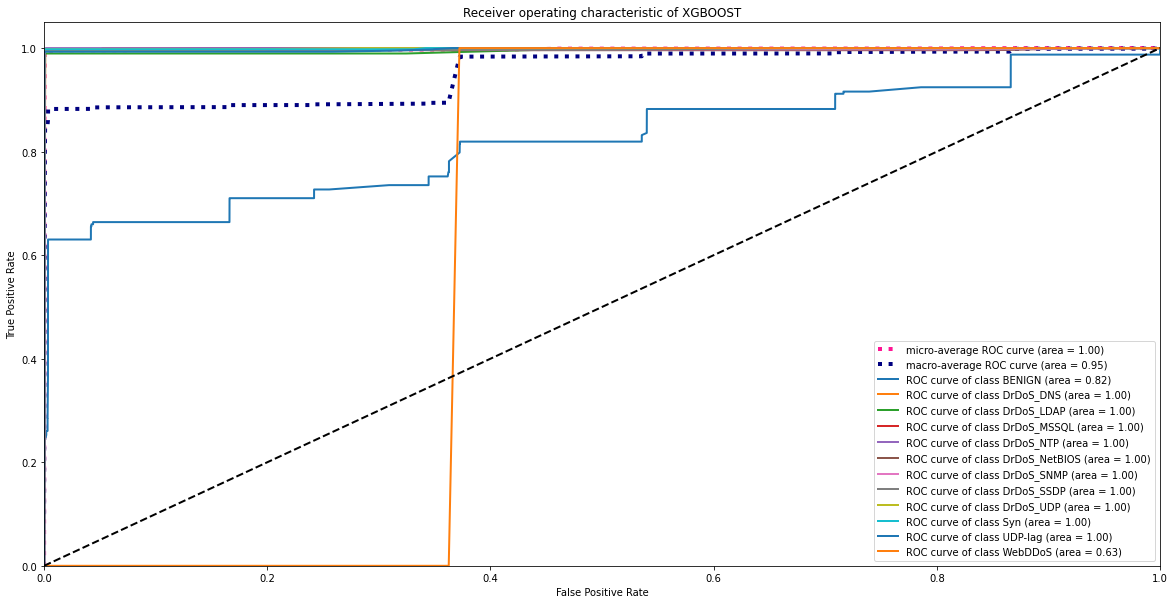

In [115]:
# RoC Curve 
title = 'Receiver operating characteristic of XGBOOST'
RoC_Curve(gradinet_boost, X_test_std_20, y_test_20, title)

## Ensemble Method of Machine Learning 

In [116]:
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [117]:
# ADABOOST 
adaboost = AdaBoostClassifier(base_estimator= dt, n_estimators=100)


In [118]:
adaboost.fit(X_train_std_20, y_train_20)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [119]:
y_pred_adaboost = adaboost.predict(X_test_std_20)

In [120]:
print("Accuracy Score for Adaboost: ", accuracy_score(y_test_20, y_pred_adaboost))

Accuracy Score for Adaboost:  0.9951073412743776


In [121]:
print("Classification Report for Adaboost: ",classification_report(le.inverse_transform(y_test_20), le.inverse_transform(y_pred_adaboost)))

Classification Report for Adaboost:                 precision    recall  f1-score   support

       BENIGN       1.00      0.23      0.38       238
    DrDoS_DNS       1.00      1.00      1.00     36586
   DrDoS_LDAP       0.99      0.99      0.99     16061
  DrDoS_MSSQL       1.00      0.99      1.00     32963
    DrDoS_NTP       0.97      1.00      0.99      9064
DrDoS_NetBIOS       1.00      1.00      1.00     29779
   DrDoS_SNMP       1.00      1.00      1.00     38531
   DrDoS_SSDP       1.00      1.00      1.00     19514
    DrDoS_UDP       1.00      1.00      1.00     23196
          Syn       1.00      1.00      1.00     10330
      UDP-lag       0.98      0.99      0.99      2432
      WebDDoS       0.00      0.00      0.00         1

     accuracy                           1.00    218695
    macro avg       0.91      0.85      0.86    218695
 weighted avg       1.00      1.00      0.99    218695



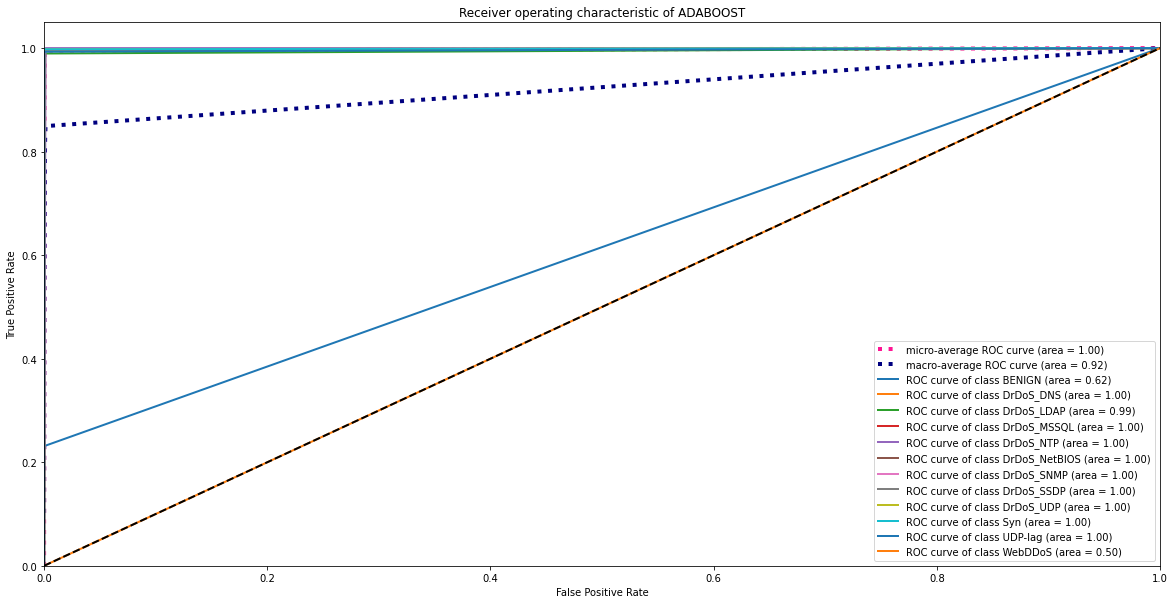

In [122]:
# RoC Curve 
title = 'Receiver operating characteristic of ADABOOST'
RoC_Curve(adaboost, X_test_std_20, y_test_20, title)

In [123]:
# Confusion Matrix 
adaboost_conf_mat = confusion_matrix(y_test_20, y_pred_adaboost)
print("Adaboost Confusion: \n", adaboost_conf_mat)

Adaboost Confusion: 
 [[   55    14    11    14    96    10     9     4     6     0    18     1]
 [    0 36406     0     0   180     0     0     0     0     0     0     0]
 [    0   168 15893     0     0     0     0     0     0     0     0     0]
 [    0     0   169 32794     0     0     0     0     0     0     0     0]
 [    0     0     0     0  9064     0     0     0     0     0     0     0]
 [    0     0     0   121     0 29658     0     0     0     0     0     0]
 [    0     0     0     0     0    96 38435     0     0     0     0     0]
 [    0     0     0     0     0     0    63 19451     0     0     0     0]
 [    0     0     0     0     0     0     0    49 23147     0     0     0]
 [    0     0     0     0     0     0     0     0     0 10307    23     0]
 [    0     0     0     0     0     0     0     0    17     0  2415     0]
 [    0     0     0     0     0     0     0     0     0     0     1     0]]


In [124]:
# Generating output for each of the classifier for Comparision with Ensemble learning 
clf_labels = ['Decision Tree', 'SVM']
# for clf, label in zip([dt, svm, gradinet_boost, adaboost], clf_labels): 
#   scores = cross_val_score(estimator=clf, X = X_train_std_20, y = y_train_20, cv = 20, scoring = 'accuracy')
#   print("Accuracy: %0.2f (+/- %0.2f) [%s]" %(scores.mean(), scores.std() * 2, label))

In [126]:
# Using Majority Voting Technique for Ensemble classification 

from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator
class MajorityVoteClassifier(BaseEstimator,
                             ClassifierMixin):
    """ A majority vote ensemble classifier
    
    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble
    
    vote : str, {'classlabel', 'probability'}
      Default: 'classlabel'
      If 'classlabel' the prediction is based on
      the argmax of class labels. Else if
      'probability', the argmax of the sum of
      probabilities is used to predict the class label
      (recommended for calibrated classifiers).
    
    weights : array-like, shape = [n_classifiers]
      Optional, default: None
      If a list of `int` or `float` values are
      provided, the classifiers are weighted by
      importance; Uses uniform weights if `weights=None`.
    
    """
    def __init__(self, classifiers,
                 vote='classlabel', weights=None):
      
        
        self.classifiers = classifiers
        self.named_classifiers = {key: value for
                                  key, value in
                                  _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights
        
    def fit(self, X, y):
        """ Fit classifiers.
        
        Parameters
        ----------
        X : {array-like, sparse matrix},
            shape = [n_examples, n_features]
            Matrix of training examples.
        
        y : array-like, shape = [n_examples]
            Vector of target class labels.
        
        Returns
        -------
        self : object
        
        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability'"
                             "or 'classlabel'; got (vote=%r)"
                             % self.vote)
        if self.weights and len(self.weights) != len(self.classifiers):
          raise ValueError("Number of classifiers and weights"
                             "must be equal; got %d weights,"
                             "%d classifiers"
                             % (len(self.weights),
                             len(self.classifiers)))
        # Use LabelEncoder to ensure class labels start
        # with 0, which is important for np.argmax
        # call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X,
                               self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self
    def predict(self, X):

        """ Predict class labels for X.
        
        Parameters
        ----------
        X : {array-like, sparse matrix},
            Shape = [n_examples, n_features]
            Matrix of training examples.
        
        Returns
        ----------
        maj_vote : array-like, shape = [n_examples]
            Predicted class labels.
        
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else: # 'classlabel' vote
            
            # Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in
                                      self.classifiers_]).T
            
            maj_vote = np.apply_along_axis(lambda x: np.argmax(
                                           np.bincount(x,
                                           weights=self.weights)),
                                           axis=1,
                                           arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote
    
    def predict_proba(self, X):
        """ Predict class probabilities for X.
        
        Parameters
        ----------
        X : {array-like, sparse matrix}, 
            shape = [n_examples, n_features]
            Training vectors, where
            n_examples is the number of examples and
            n_features is the number of features.
        
        Returns
        ----------
        avg_proba : array-like,
            shape = [n_examples, n_classes]
            Weighted average probability for
            each class per example.
        
        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0,
                               weights=self.weights)
        return avg_proba
    
    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, 
                           self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in self.named_classifiers.items():
                for key, value in step.get_params(
                        deep=True).items():
                    out['%s__%s' % (name, key)] = value
            return out

In [127]:
mv_clf = MajorityVoteClassifier(classifiers = [dt, svm, gradinet_boost, adaboost], vote='classlabel')
clf_labels += ['Majority Voting']
all_clf = [dt, svm, mv_clf]


In [128]:
for clf, label in zip(all_clf, clf_labels):
  scores = cross_val_score(estimator=clf, X = X_train_std_20, y= y_train_20, cv = 5, scoring = 'accuracy')
  print("Accuracy Score: %0.2f (+/- %0.2f) [%s]" %(scores.mean(), scores.std()*2, label))

Accuracy Score: 1.00 (+/- 0.00) [Decision Tree]


KeyboardInterrupt: 

### Ouptut for 

for clf, label in zip(all_clf, clf_labels):
  scores = cross_val_score(estimator=clf, X = X_train_std_20, y= y_train_20, cv = 5, scoring = 'accuracy')
  print("Accuracy Score: %0.2f (+/- %0.2f) [%s]" %(scores.mean(), scores.std()*2, label))

### Accuracy Score: 1.00 (+/- 0.00) [Decision Tree]
c:\Users\Kaibo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Kaibo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Kaibo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Kaibo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Kaibo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
### Accuracy Score: 0.92 (+/- 0.00) [SVM]
c:\Users\Kaibo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Kaibo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Kaibo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Kaibo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Kaibo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
### Accuracy Score: 1.00 (+/- 0.00) [Majority Voting]

In [129]:
mv_clf2 = MajorityVoteClassifier(classifiers = [rf, adaboost, dt, gradinet_boost], vote='classlabel')

In [131]:
# Train the classifiers 
mv_clf2.fit(X_train_std_20, y_train_20)

KeyboardInterrupt: 

In [ ]:
# Predict the labels 
y_pred_mjv = mv_clf2.predict(X_test_std_20)

In [ ]:
# Classification Accuracy for Majority Voting
print("Accuracy Score for Majority Voting : ", accuracy_score(y_test_20, y_pred_mjv))

Accuracy Score for Majority Voting :  0.9951073412743776


In [ ]:
# Classification Report 
print("Classification Report for Adaboost: ",classification_report(le.inverse_transform(y_test_20), le.inverse_transform(y_pred_mjv)))

Classification Report for Adaboost:                 precision    recall  f1-score   support

       BENIGN       1.00      0.23      0.38       238
    DrDoS_DNS       1.00      1.00      1.00     36586
   DrDoS_LDAP       0.99      0.99      0.99     16061
  DrDoS_MSSQL       1.00      0.99      1.00     32963
    DrDoS_NTP       0.97      1.00      0.99      9064
DrDoS_NetBIOS       1.00      1.00      1.00     29779
   DrDoS_SNMP       1.00      1.00      1.00     38531
   DrDoS_SSDP       1.00      1.00      1.00     19514
    DrDoS_UDP       1.00      1.00      1.00     23196
          Syn       1.00      1.00      1.00     10330
      UDP-lag       0.98      0.99      0.99      2432
      WebDDoS       0.00      0.00      0.00         1

     accuracy                           1.00    218695
    macro avg       0.91      0.85      0.86    218695
 weighted avg       1.00      1.00      0.99    218695



In [ ]:
# Confusion Matrix 
majorityvoting_conf_mat = confusion_matrix(y_test_20, y_pred_mjv)
print("Majority Voting Confusion: \n", majorityvoting_conf_mat)

Majority Voting Confusion: 
 [[   55    14    11    14    96    10     9     4     6     0    18     1]
 [    0 36406     0     0   180     0     0     0     0     0     0     0]
 [    0   168 15893     0     0     0     0     0     0     0     0     0]
 [    0     0   169 32794     0     0     0     0     0     0     0     0]
 [    0     0     0     0  9064     0     0     0     0     0     0     0]
 [    0     0     0   121     0 29658     0     0     0     0     0     0]
 [    0     0     0     0     0    96 38435     0     0     0     0     0]
 [    0     0     0     0     0     0    63 19451     0     0     0     0]
 [    0     0     0     0     0     0     0    49 23147     0     0     0]
 [    0     0     0     0     0     0     0     0     0 10307    23     0]
 [    0     0     0     0     0     0     0     0    17     0  2415     0]
 [    0     0     0     0     0     0     0     0     0     0     1     0]]


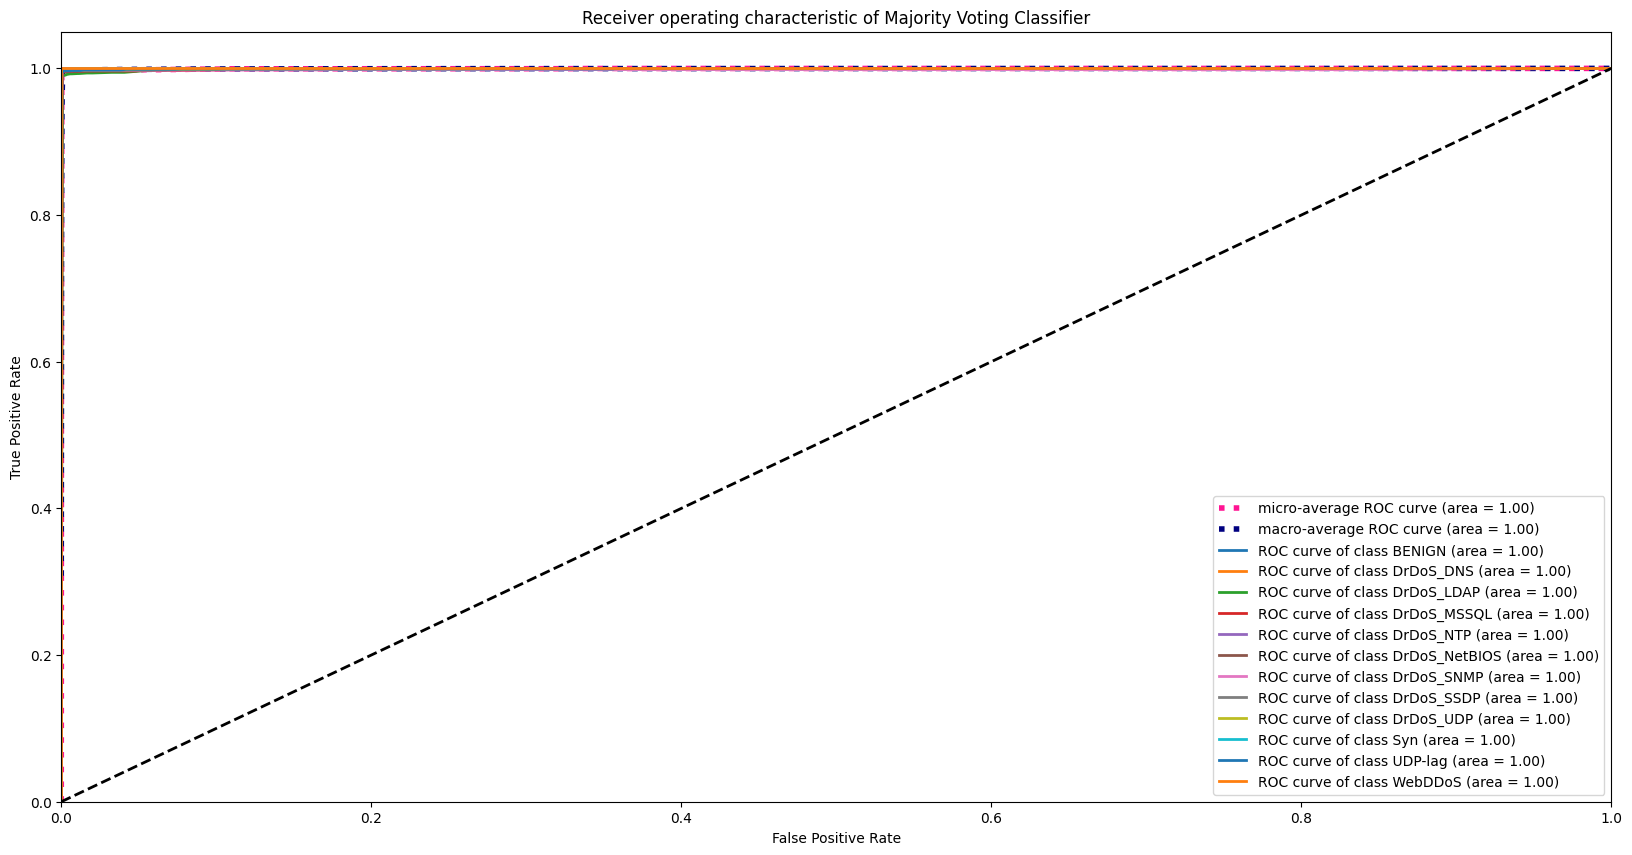

In [ ]:
# RoC curve for Majority Voting 

title = 'Receiver operating characteristic of Majority Voting Classifier'
RoC_Curve(mv_clf2, X_test_std_20, y_test_20, title)
